<a href="https://colab.research.google.com/github/TKhahahah/Text_Analytics/blob/main/Text_Analytics68.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 1: Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="500" />

ชื่อกลุ่ม: ...

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. นายวัฒนศักดิ์ คลังแสง 663020039-3
2. นางสาวศศิวิมล ภาณุโชติ 663020040-8
3. นายภัทรพล วรรณยศ 663020287-4
4. ...

กำหนดส่ง: อาทิตย์ 5 ตุลาคม 2568 \
รายงานในชั้นเรียน: จันทร์ 6 ตุลาคม 2568

**ผลที่คาดหวังจากการทำงานนี้**
* สามารถใช้ Python ในการอ่านข้อมูล
* จัดการกับข้อมูลเบื้องต้นในรูปแบบข้อความก่อนนำไปวิเคราะห์
* สามารถวิเคราะห์ข้อมูลตัวอักษรเบื้องต้นและสร้าง Data Visualization ที่เหมาะสมได้
----------------------

In [42]:
"""
หากไม่สามารถลง library ใด ให้ดาวน์โหลดดังตัวอย่างต่อไปนี้
!pip install nltk
!pip install wordcloud
!pip install Pillow
"""
# Load these libraries
import json
import pprint
import pandas as pd
import numpy as np
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import urllib.request
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Working with Twitter Data and JSON file
*หมายเหตุ: ไม่ต้องนำเสนอข้อนี้*

จากข้อมูลทวิตเตอร์เกี่ยวกับประเทศไทยที่เก็บในวันที่ 31 สิงหาคม 2565 ในรูปแบบ JSON จาก `thailand_tweets.txt` ซึ่งมีการดึงข้อมูลมาด้วยคีเวิร์ด "Thailand" ให้ทำการศึกษาข้อมูลและดึงค่าจากข้อมูล \
ทั้งนี้เราสามารถเรียกหน้าทวีตจาก tweet ID ได้ดังนี้
```
twitter.com/anyuser/status/<tweet_id>
```


#### Read JSON file

In [4]:
# ----------------- Your code here -----------------
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
# ----------------- Your code here -----------------
thai_tweets = open('/content/drive/MyDrive/DTW2/thailand_tweets.txt','r')

In [6]:
th = thai_tweets.read()
j_thai_tweets = json.loads(th)

In [7]:
j_thai_tweets

'{"1564764893038882816": {"tweet_id": "1564764893038882816", "username": "matthunter", "name": "MATT HUNT\\u039eR", "profile_picture": "https://twitter.com/matthunter/photo", "replies": 2, "retweets": 1, "likes": 7, "is_retweet": false, "posted_time": "2022-08-30T23:59:57+00:00", "content": "Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ", "hashtags": [], "mentions": [], "images": [], "videos": [], "tweet_url": "https://twitter.com/matthunter/status/1564764893038882816", "link": ""}, "1564764866598080513": {"tweet_id": "1564764866598080513", "username": "DavSmithVP", "name": "DavSmith / Virtual Photography", "profile_picture": "https://twitter.com/DavSmithVP/photo", "replies": 0, "retweets": 0, "likes": 2, "is_retweet": false, "posted_time": "2022-08-30T23:59:50+00:00", "content": "Tomb Raider Underworld | Thailand \\n#VirtualPhotography \\n@tombraider\\n @crystaldynamics", "hashtags": ["VirtualPhotography"], "mentions": ["tombraider"

#### Inspect data in JSON format (either reading using pretty print or Pandas data frame)

In [8]:
# ----------------- Your code here -----------------
pd_thai_tweets = pd.read_json(StringIO(j_thai_tweets), orient='index').head()
pd_thai_tweets

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
2019-08-02 16:54:53.038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
2019-08-02 16:54:26.598080513,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2019-08-02 16:54:05.685280772,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
2019-08-02 16:51:50.804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
2019-08-02 16:47:48.277612549,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,


In [9]:
pd_thai_tweets.shape

(5, 16)

#### Report: จงตอบคำถามต่อไปนี้
* The total number of tweets collected in the file
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts  
* Display the top 5 tweets that are the most popular among your collection \
สามารถใช้ `np.argsort(<list>)[:5]` ซึ่งจะแสดงผล indices ของการเรียงค่าจากน้อยสุดไปมากสุด จำนวน 5 ค่า และ `np.argsort(<list>)[::-1][:5]` จะแสดงผล indices ของการเรียงค่าจากมากไปน้อยจำนวน 5 ค่า (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [28]:
#The total number of tweets collected in the file
total_tweets = len(j_thai_tweets)
print(f"จำนวนทวีตทั้งหมด: {total_tweets}")

จำนวนทวีตทั้งหมด: 18558


In [36]:
#The content of the first tweet:
# parse string -> dict
tweets = json.loads(j_thai_tweets)

# ดึงทวีตแรก
first_key = next(iter(tweets))
first_tweet = tweets[first_key]

print("Tweet ID:", first_tweet["tweet_id"])
print("Content:", first_tweet["content"])

Tweet ID: 1564764893038882816
Content: Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 


In [39]:
#Is the first tweet contained any hashtags or mentions?
# ดึงทวีตแรก
first_key = next(iter(tweets))
first_tweet = tweets[first_key]

print("Tweet ID:", first_tweet["tweet_id"])
print("Content:", first_tweet["content"])
print("Hashtags:", first_tweet["hashtags"])
print("Mentions:", first_tweet["mentions"])

# ตรวจสอบแบบเงื่อนไข
if not first_tweet["hashtags"]:
    print(" No hashtags in the first tweet")
else:
    print(" Hashtags found")

if not first_tweet["mentions"]:
    print(" No mentions in the first tweet")
else:
    print(" Mentions found")

Tweet ID: 1564764893038882816
Content: Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 
Hashtags: []
Mentions: []
 No hashtags in the first tweet
 No mentions in the first tweet


In [44]:
# Collect all hashtags related to Thailand from this data

# เก็บ hashtags ที่มีคำว่า thailand (ไม่สนตัวเล็ก-ใหญ่)
hashtags = []
for tweet in tweets.values():
    for tag in tweet.get("hashtags", []):
        if "thailand" in tag.lower():
            hashtags.append(tag)

# นับความถี่
hashtag_counts = Counter(hashtags)

# แสดงผล
for tag, count in hashtag_counts.items():
    print(f"{tag}: {count}")

thailand: 1
Thailand: 1


In [46]:
# Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
# แปลงเป็น DataFrame
df = pd.DataFrame.from_dict(tweets, orient="index")

# สร้างคอลัมน์รวม engagement
df["engagement"] = df["replies"] + df["retweets"] + df["likes"]

# หาทวีตที่ popular ที่สุด Top 5
top5 = df.sort_values("engagement", ascending=False).head(5)

# แสดงผล
for i, row in top5.iterrows():
    print(f"Tweet ID: {row['tweet_id']}")
    print(f"Username: {row['username']}")
    print(f"Engagement: {row['engagement']}")
    print(f"Content: {row['content']}\n")

Tweet ID: 1564764445825458181
Username: OhmPawatInter
Engagement: 242
Content: Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 top tweets
25182 retweets

https://etrenders.com/trendsetters/Thailand…
#ohmpawat #ยิ้ม5พันของโอมภวัต

Tweet ID: 1564762341324992513
Username: Zeepruk_jfc
Engagement: 88
Content: Can you help me?

tracking number
FMP200001150XX

Does anyone know a shipping company in Thailand that handles this number?
I'm in trouble with no reply even if I contact the caller 

#Zunshine

Tweet ID: 1564763729967054848
Username: o_rung_o1
Engagement: 43
Content: วันนี้วันสุดท้ายของการโหวต รางวัล Outstanding Asian Star Thailand #SDA2022 ให้น้องพีพีแล้วนะคะ 
มาพาน้องไปรับถ้วยรางวัล2ปีซ้อนกันค่ะ
#voteforppkritt 
#ppkritt

Tweet ID: 1564764361742110720
Username: nato_tonyo11
Engagement: 20
Content: Good morning  world! And goodmorning to you too #DonnyPangilinan, enjoy Thailand babe and please do take selfies out there!, pagod

In [50]:
# Display the top 5 tweets that are the most popular among your collection
# แปลงเป็น DataFrame
df = pd.DataFrame.from_dict(tweets, orient="index")

# เพิ่มคอลัมน์ engagement
df["engagement"] = df["replies"] + df["retweets"] + df["likes"]

# เลือก Top 5
top5 = df.sort_values("engagement", ascending=False).head(5)

top5


,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link,engagement
1564764445825458181,1564764445825458181,OhmPawatInter,OhmPawat International,https://twitter.com/OhmPawatInter/photo,0,99,143,False,2022-08-30T23:58:10+00:00,Trend twitter update \n\nTop Twitter influence...,"[4, ohmpawat, ย]",[ohmpawatt],[https://pbs.twimg.com/media/Fbco99jWIAEd3Oe?f...,[],https://twitter.com/OhmPawatInter/status/15647...,,242
1564762341324992513,1564762341324992513,Zeepruk_jfc,ZeePruk_JapanFC（Rest）,https://twitter.com/Zeepruk_jfc/photo,2,54,32,False,2022-08-30T23:49:48+00:00,Can you help me?\n\ntracking number\nFMP200001...,[Zunshine],[],[],[],https://twitter.com/Zeepruk_jfc/status/1564762...,,88
1564763729967054848,1564763729967054848,o_rung_o1,o_Rung_o,https://twitter.com/o_rung_o1/photo,0,28,15,False,2022-08-30T23:55:19+00:00,วันนี้วันสุดท้ายของการโหวต รางวัล Outstanding ...,"[SDA2022, voteforppkritt, ppkritt]",[],[https://pbs.twimg.com/media/FbcoUQAaQAAIFME?f...,[],https://twitter.com/o_rung_o1/status/156476372...,,43
1564764361742110720,1564764361742110720,nato_tonyo11,nutri(BUSY SI ENGR.)| SoliD,https://twitter.com/nato_tonyo11/photo,0,2,18,False,2022-08-30T23:57:50+00:00,Good morning world! And goodmorning to you to...,[DonnyPangilinan],[],[],[],https://twitter.com/nato_tonyo11/status/156476...,,20
1564763185244426240,1564763185244426240,Jay_beebee,Jay Bee,https://twitter.com/Jay_beebee/photo,1,7,7,True,2022-08-30T23:53:09+00:00,"พร้อมครัช\n\nPlease,come to thailand.\n \n\n#J...","[JAYB, 제이비, GOT7, 갓세븐, CDNZA, Def]","[jaybnow_hr, GOT7, cdnzarecords]",[https://pbs.twimg.com/media/FbcmB6RUEAA75m6?f...,[],https://twitter.com/Jay_beebee/status/15647631...,,15


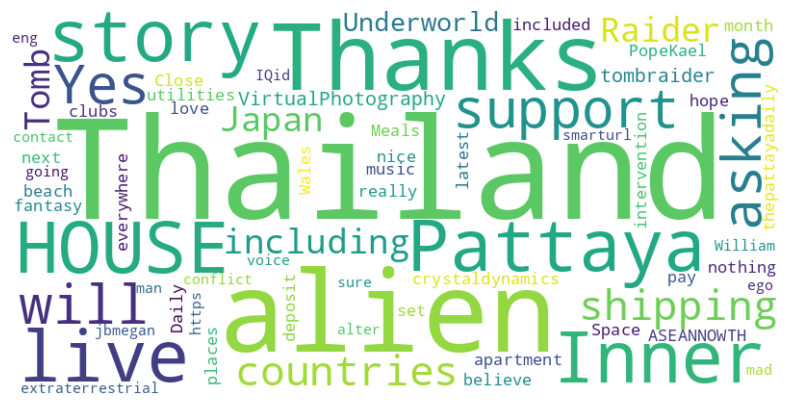

In [54]:
#Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

# Combine all tweet contents into a single string
all_tweet_content = " ".join(pd_thai_tweets['content'])

# Create a WordCloud object without specifying font_path
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweet_content)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Problem 2: Study Collected Yelp Reviews

![](https://techcrunch.com/wp-content/uploads/2022/08/Yelp-Android_Full-Experience.jpg?w=1390&crop=1)

ดาวน์โหลด Yelp dataset เกี่ยวกับรีวิวของผู้ใช้บริการธุรกิจต่าง ๆ จาก https://www.yelp.com/dataset
<br>
รายละเอียดข้อมูล https://www.yelp.com/dataset/documentation/main
<br>
ให้ศึกษาข้อมูลจากไฟล์ yelp_academic_dataset_review.json, yelp_academic_dataset_business.json, และ yelp_academic_dataset_user.json

### อ่านข้อมูล Reviews, Businesses, และ Users เป็นจำนวน 100,000 รีวิว

In [ ]:
# เปลี่ยน path ของ working directory เช่น ที่ไหนใน Google Drive
myDirectory = "/content/drive/MyDrive/DTW2/thailand_tweets.txt"
reviewFilePath = "yelp_academic_dataset_review.json"
businessFilePath = "yelp_academic_dataset_business.json"
userFilePath = "yelp_academic_dataset_user.json"

อ่านข้อมูล review

In [ ]:
# We only use the first 100,000 reviews
n = 100000
reviews = []
with open(myDirectory+reviewFilePath) as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        if i+1 >= n:
            break
reviews = pd.DataFrame(reviews)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float64
 4   useful       100000 non-null  int64  
 5   funny        100000 non-null  int64  
 6   cool         100000 non-null  int64  
 7   text         100000 non-null  object 
 8   date         100000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


อ่านข้อมูล business

In [ ]:
businesses = []
with open(myDirectory+businessFilePath) as fl:
    for i, line in enumerate(fl):
        businesses.append(json.loads(line))
businesses = pd.DataFrame(businesses)
businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


อ่านข้อมูล user

In [ ]:
users = []
with open(myDirectory+userFilePath) as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
users = pd.DataFrame(users)
users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


### รวมข้อมูล Reviews, Businesses, และ Users และสำรวจตัวแปรในข้อมูล

In [ ]:
# join reviews and businesses data using inner join
df = pd.merge(reviews, businesses, on='business_id', suffixes=('_review', '_business'))
# join reviews-businesses and users data using inner join
df = pd.merge(df, users, on='user_id', suffixes=('_review_business', '_user'))
df

,review_id,user_id,business_id,stars_review,useful_review_business,funny_review_business,cool_review_business,text,date,name_review_business,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,0,0,0,0,0,0,1,1,0,0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,...,0,0,0,0,0,0,0,0,0,0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,...,14,3,1,1,63,96,86,86,49,27
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,1,0,0,0,0,0,0,0,0,0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,...,0,0,0,0,0,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,pAEbIxvr6ebx2bHc1XvguA,SMH5CeiLvKx61lKwtLZ_PA,lV0k3BnslFRkuWD_kbKd0Q,4.0,0,0,0,Came here for lunch with a group. They were bu...,2018-05-30 22:28:56,Metro Diner,...,0,0,0,0,0,0,3,3,0,0
99996,xH1AoE-4nf2ECGQJRjO4_g,2clTdtp-BjphxLjN83CpUA,G0xz3kyRhRi6oZl7KfR0pA,1.0,1,0,0,The equipment is so old and so felty! I just u...,2015-04-05 23:31:52,Esporta Fitness,...,0,0,0,0,0,3,0,0,0,0
99997,GatIbXTz-WDru5emONUSIg,MRrN6DH3QGCFcDv5RENYVg,C4lZdhasjZVQyDlOiXY1sA,4.0,0,0,0,This is one of my favorite Mexican restaurants...,2016-06-04 00:59:15,Buena Vista Mexican Restaurant,...,0,0,0,0,1,1,0,0,0,0
99998,6NfkodAdhvI89xONXuBC3A,rnNQzeKJbvqVCsYsL10mkQ,dChRGpit9fM_kZK5pafNyA,2.0,0,0,0,Came here for brunch - had an omlette ($19 + t...,2018-06-11 12:45:08,The Love,...,1,0,0,0,5,1,1,1,0,0


### ทำการสำรวจข้อมูลเบื้องต้น

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   review_id                     100000 non-null  object 
 1   user_id                       100000 non-null  object 
 2   business_id                   100000 non-null  object 
 3   stars_review                  100000 non-null  float64
 4   useful_review_business        100000 non-null  int64  
 5   funny_review_business         100000 non-null  int64  
 6   cool_review_business          100000 non-null  int64  
 7   text                          100000 non-null  object 
 8   date                          100000 non-null  object 
 9   name_review_business          100000 non-null  object 
 10  address                       100000 non-null  object 
 11  city                          100000 non-null  object 
 12  state                         100000 non-null

สำรวจการแจกแจงของจำนวนรีวิวที่แต่ละ user ให้

In [ ]:
# ----------------- Your code here -----------------


สำรวจการแจกแจงของจำนวนรีวิวและจำนวนดาวที่แต่ละ business ได้รับ

In [ ]:
# ----------------- Your code here -----------------


มีธุรกิจกี่แบบ และธุรกิจในแต่ละแบบมีจำนวนเท่าไหร่

* ลองแยก `categories` ออกเป็น category ย่อย แล้วสามารถนับหรือใช้ฟังก์ชัน Counter `from collections import Counter` ในการนับจำนวนหรือความถี่ของธุรกิจแต่ละแบบ \
ตัวอย่าง https://www.geeksforgeeks.org/counters-in-python-set-1/

In [ ]:
# ----------------- Your code here -----------------


### ให้ตั้งปัญหาหรือคำถาม และวิเคราะห์ข้อมูลเพื่อตอบคำถามดังกล่าว

<ระบุจุดประสงค์ของการศึกษา>

In [ ]:
# ----------------- Your code here -----------------


In [ ]:
#----------------------------------------------
# Your code starts here
# create some data visualization for the analysis and your presentation






## Problem 3: Retrieving Data from Internet

ให้แต่ละกลุ่มคิดหัวข้อที่สนใจ และทำการดึงข้อมูลเกี่ยวกับหัวข้อที่สนใจผ่าน url ด้วยฟังก์ชัน `urllib.request.urlopen` จากแหล่งข้อมูลออนไลน์อย่างน้อย 10 แห่ง รวบรวมข้อมูลให้เป็นหนึ่งเดียว

In [ ]:
#----------------------------------------------
# Your code starts here


เตรียมข้อมูลและทำความสะอาดข้อมูลด้วยการทำ lower case, tokenization, removing stopwords (as well as punctuations, unrelated symbols, etc.), stemming, lemmatization เป็นต้น

In [ ]:
#----------------------------------------------
# Your code starts here


Text Mining: ทำการวิเคราะห์ข้อความที่รวบรวมมาได้ พร้อมทั้งแสดงการนำเสนอที่สร้างสรรค์

In [ ]:
#----------------------------------------------
# Your code starts here


-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * ตอบคำถามต่าง ๆ ใน Notebook
    * อธิบายวิธีการที่ใช้ และแสดง screenshots ของผลลัพธ์ที่ได้จาก Python Notebook โดยแสดงภาพและตาราง โดยไม่จำเป็นที่จะต้องนำเสนอ source code

** Note: แต่ละกลุ่มส่งแค่ครั้งเดียว **